In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import io
from google.colab import files

In [2]:
#Carregar arquivos a serem analisados
url = "/content/drive/MyDrive/MESTRADO/DADOS/OCORRENCIAS/"

df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2020 = pd.read_csv(io.StringIO(open(f'{url}datatran2020.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2021 = pd.read_csv(io.StringIO(open(f'{url}datatran2021.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2022 = pd.read_csv(io.StringIO(open(f'{url}datatran2022.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2023 = pd.read_csv(io.StringIO(open(f'{url}datatran2023.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)

<ipython-input-2-c9c08b7e939a>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-2-c9c08b7e939a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-2-c9c08b7e939a>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-2-c9c08b7e939a>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be

In [3]:
#concatenar os arquivos de análise em apenas um
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

df.shape

(164946, 30)

In [4]:
#armazenar o cabecalho dos dados em uma variavel

colunas = df.columns

print(colunas)

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')


In [5]:
#Verificando valores nulos nas colunas

df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        266
km                        266
municipio                   0
causa_acidente              0
tipo_acidente              20
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    4
delegacia                 246
uop                       377
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(164145, 30)

In [8]:
#verificando tipos de valores armazendos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164145 entries, 0 to 164945
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      164145 non-null  object 
 1   data_inversa            164145 non-null  object 
 2   dia_semana              164145 non-null  object 
 3   horario                 164145 non-null  object 
 4   uf                      164145 non-null  object 
 5   br                      164145 non-null  float64
 6   km                      164145 non-null  object 
 7   municipio               164145 non-null  object 
 8   causa_acidente          164145 non-null  object 
 9   tipo_acidente           164145 non-null  object 
 10  classificacao_acidente  164145 non-null  object 
 11  fase_dia                164145 non-null  object 
 12  sentido_via             164145 non-null  object 
 13  condicao_metereologica  164145 non-null  object 
 14  tipo_pista          

In [9]:
#convertendo colunas para o formato de float

convert_float = ['km', 'latitude','longitude']

for coluna in convert_float:
    df[coluna] = df[coluna].str.replace(',', '.')
    df[coluna]= pd.to_numeric(df[coluna], errors='coerce')

In [10]:
#verificando tipos de valores armazendos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164145 entries, 0 to 164945
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      164145 non-null  object 
 1   data_inversa            164145 non-null  object 
 2   dia_semana              164145 non-null  object 
 3   horario                 164145 non-null  object 
 4   uf                      164145 non-null  object 
 5   br                      164145 non-null  float64
 6   km                      164145 non-null  float64
 7   municipio               164145 non-null  object 
 8   causa_acidente          164145 non-null  object 
 9   tipo_acidente           164145 non-null  object 
 10  classificacao_acidente  164145 non-null  object 
 11  fase_dia                164145 non-null  object 
 12  sentido_via             164145 non-null  object 
 13  condicao_metereologica  164145 non-null  object 
 14  tipo_pista          

# REDE NEURAL ARTIFICIAL
Tentativa de classificar um acidente

In [11]:
# #verificando se há outiliers nas colunas numéricas
# import matplotlib.pyplot as plt


# colunas_numericas = ['br','km','uso_solo', 'pessoas', 'mortos', 'feridos_leves',
#                      'feridos_graves', 'ilesos', 'ignorados', 'feridos',
#                      'veiculos', 'latitude', 'longitude']

# fig, axs = plt.subplots(len(colunas_numericas),1,dpi=95, figsize=(7,17))
# i = 0
# for col in colunas_numericas:
#     axs[i].boxplot(df[col], vert=False)
#     axs[i].set_ylabel(col)
#     i+=1
# plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report


# Pré-processamento dos dados
# Remover colunas irrelevantes para predição
data = df.drop(columns=['id', 'data_inversa', 'municipio', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'])
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

In [13]:
# Divisão dos dados em features e target
X = data.drop(columns=['classificacao_acidente'])
y = data['classificacao_acidente']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construção do modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliação do modelo
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/10
4104/4104 [==============================] - 11s 2ms/step - loss: -116305.8984 - accuracy: 0.7490 - val_loss: -407719.0938 - val_accuracy: 0.7596
Epoch 2/10
4104/4104 [==============================] - 8s 2ms/step - loss: -1187531.7500 - accuracy: 0.7554 - val_loss: -2235262.7500 - val_accuracy: 0.7589
Epoch 3/10
4104/4104 [==============================] - 9s 2ms/step - loss: -3983811.0000 - accuracy: 0.7551 - val_loss: -6058445.5000 - val_accuracy: 0.7589
Epoch 4/10
4104/4104 [==============================] - 9s 2ms/step - loss: -9101946.0000 - accuracy: 0.7550 - val_loss: -12498859.0000 - val_accuracy: 0.7588
Epoch 5/10
4104/4104 [==============================] - 8s 2ms/step - loss: -17165790.0000 - accuracy: 0.7548 - val_loss: -22130666.0000 - val_accuracy: 0.7588
Epoch 6/10
4104/4104 [==============================] - 10s 2ms/step - loss: -28722728.0000 - accuracy: 0.7547 - val_loss: -35530216.0000 - val_accuracy: 0.7587
Epoch 7/10
4104/4104 [=========================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Prever o local do acidente

Tratando como um problema de regressão logística

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from google.colab import files

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [17]:
#Carregar arquivos a serem analisados
url = "/content/drive/MyDrive/MESTRADO/DADOS/OCORRENCIAS/"

df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2020 = pd.read_csv(io.StringIO(open(f'{url}datatran2020.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2021 = pd.read_csv(io.StringIO(open(f'{url}datatran2021.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2022 = pd.read_csv(io.StringIO(open(f'{url}datatran2022.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2023 = pd.read_csv(io.StringIO(open(f'{url}datatran2023.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)

#concatenar os arquivos de análise em apenas um
data = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

data.shape

<ipython-input-17-45bca1506e22>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-17-45bca1506e22>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-17-45bca1506e22>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-17-45bca1506e22>:6: FutureWarning: The error_bad_lines argument has been deprecated and wil

(164946, 30)

In [18]:
#Verificando valores nulos nas colunas

data.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        266
km                        266
municipio                   0
causa_acidente              0
tipo_acidente              20
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    4
delegacia                 246
uop                       377
dtype: int64

In [19]:
data = data.dropna()

In [20]:
# Pré-processamento dos dados
# Remover colunas irrelevantes para predição
data = df.drop(columns=['id','data_inversa','regional','delegacia',
                        'uop'])


data.isnull().sum()

dia_semana                    0
horario                       0
uf                            0
br                            0
km                            0
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
pessoas                       0
mortos                        0
feridos_leves                 0
feridos_graves                0
ilesos                        0
ignorados                     0
feridos                       0
veiculos                      0
latitude                  27528
longitude                 27686
dtype: int64

In [21]:
data.head()

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,segunda-feira,06:00:00,TO,153.0,393.1,RIO DOS BOIS,Falta de Atenção à Condução,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Não Informado,0,2,0,0,1,1,0,1,2,-9.356414,-48.546103
1,segunda-feira,08:30:00,SE,101.0,123.4,ITAPORANGA DAJUDA,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,0,2,0,0,0,2,0,0,2,-11.044760,-37.364980
2,segunda-feira,08:50:00,TO,153.0,347.0,GUARAI,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Não Informado,0,2,0,0,0,2,0,0,2,-8.952295,-48.500107
3,segunda-feira,05:30:00,PA,155.0,221.0,ELDORADO DO CARAJAS,Ingestão de Álcool,Colisão lateral,Com Vítimas Fatais,Amanhecer,Crescente,Céu Claro,Simples,Reta,0,2,1,0,0,1,0,0,2,-6.345512,-49.389626
4,segunda-feira,10:25:00,BA,116.0,289.6,TUCANO,Ultrapassagem Indevida,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,0,1,0,0,1,0,0,1,1,-11.086617,-38.834202


In [22]:
# Selecionar as colunas categóricas
cols_categoricas = ['horario','dia_semana', 'uf','br', 'km','municipio','causa_acidente',
                    'tipo_acidente','classificacao_acidente','fase_dia','sentido_via',
                    'condicao_metereologica','tipo_pista', 'tracado_via','latitude','longitude']

# Aplicar a codificação LabelEncoder em cada coluna categórica
label_encoder = LabelEncoder()
for col in cols_categoricas:
    data[col] = label_encoder.fit_transform(data[col])

In [23]:
data.isnull().sum()

dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
dtype: int64

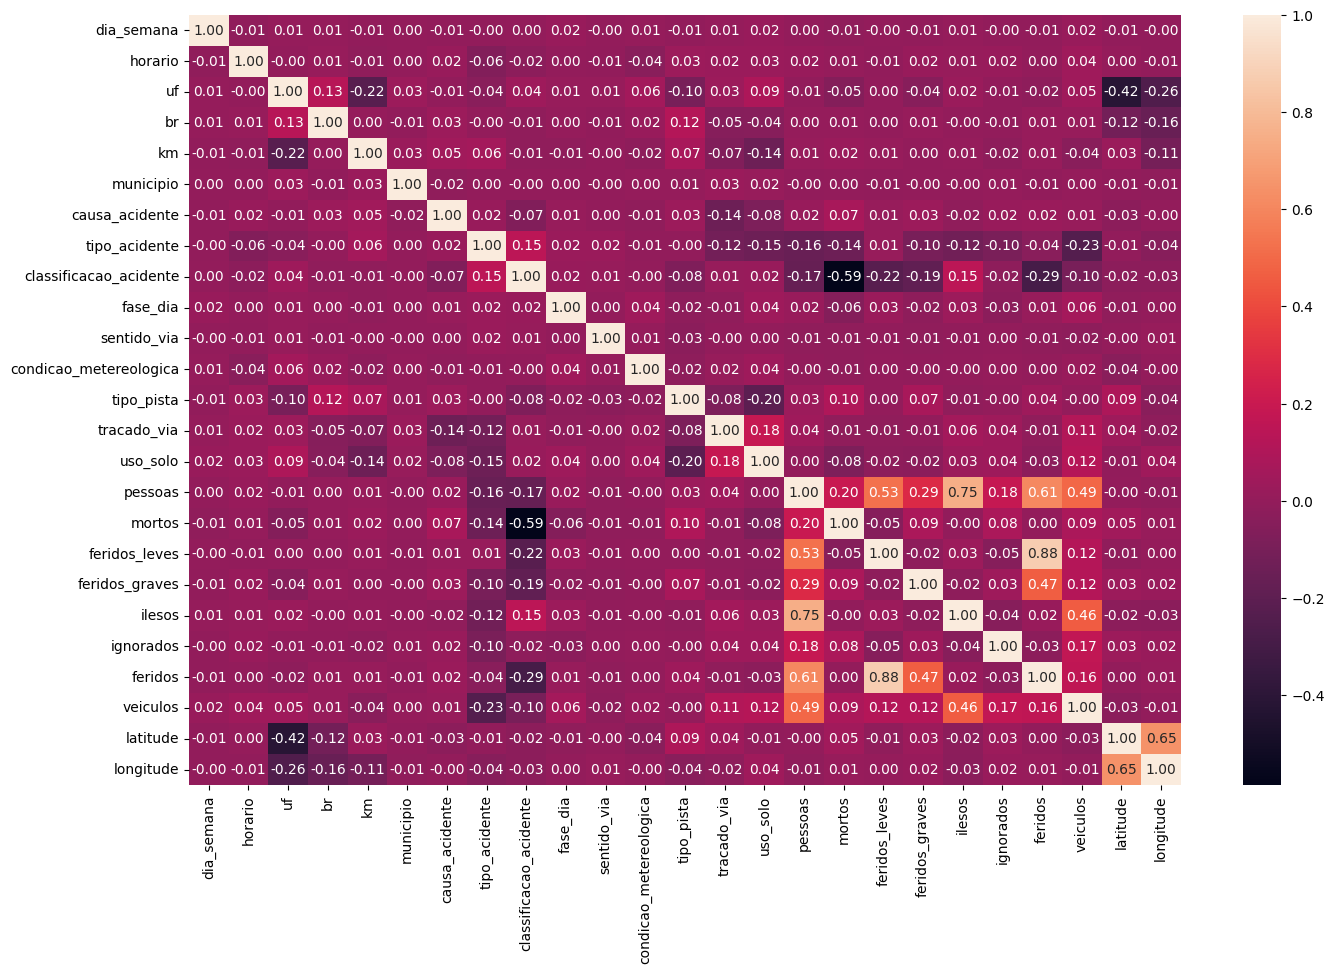

In [24]:
#correlation
corr = data.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, fmt= '.2f')
plt.show()

In [25]:
# Divisão dos dados em features e target
X = data.drop(columns=['br'])
y = data['br']

In [26]:
# Codificação das variáveis categóricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [27]:
X.head()

,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,3,349,26,3929,1466,37,6,1,3,1,1,2,3,0,2,0,0,1,1,0,1,2,61519,35524
1,3,499,24,1234,843,56,11,2,3,1,1,0,5,0,2,0,0,0,2,0,0,2,58572,69432
2,3,519,26,3469,708,37,7,2,3,0,1,2,3,0,2,0,0,0,2,0,0,2,62260,35745
3,3,319,13,2210,571,47,7,0,0,0,1,2,5,0,2,1,0,0,1,0,0,2,68180,27109
4,3,614,4,2896,1831,88,18,1,3,0,8,2,5,0,1,0,0,1,0,0,1,1,58533,66571


In [28]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Construção do modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Usamos a função de ativação softmax para problemas de classificação multiclasse
])

# # Construir a rede neural
# model = Sequential([
#     Dense(128, input_dim=X_train.shape[1], activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(len(np.unique(y)), activation='softmax')
# ])

In [30]:
# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Treinar o modelo
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
4104/4104 [==============================] - 10s 2ms/step - loss: 2.1288 - accuracy: 0.4000 - val_loss: 1.5200 - val_accuracy: 0.5488
Epoch 2/10
4104/4104 [==============================] - 10s 3ms/step - loss: 1.4942 - accuracy: 0.5388 - val_loss: 1.2510 - val_accuracy: 0.6249
Epoch 3/10
4104/4104 [==============================] - 10s 3ms/step - loss: 1.3229 - accuracy: 0.5843 - val_loss: 1.1278 - val_accuracy: 0.6625
Epoch 4/10
4104/4104 [==============================] - 11s 3ms/step - loss: 1.2165 - accuracy: 0.6170 - val_loss: 1.0458 - val_accuracy: 0.6875
Epoch 5/10
4104/4104 [==============================] - 9s 2ms/step - loss: 1.1480 - accuracy: 0.6387 - val_loss: 0.9720 - val_accuracy: 0.7157
Epoch 6/10
4104/4104 [==============================] - 10s 2ms/step - loss: 1.0939 - accuracy: 0.6547 - val_loss: 0.9289 - val_accuracy: 0.7308
Epoch 7/10
4104/4104 [==============================] - 10s 2ms/step - loss: 1.0563 - accuracy: 0.6691 - val_loss: 0.8967 - val_acc

In [32]:
# Avaliação do modelo
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Obtemos o índice da classe com maior probabilidade para cada exemplo
print(classification_report(y_test, y_pred))

1026/1026 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.65      0.80      0.71       215
           1       0.83      0.76      0.79       416
           2       0.00      0.00      0.00        13
           3       0.77      0.85      0.81      1450
           4       0.88      0.89      0.88       407
           5       0.74      0.76      0.75       469
           6       0.59      0.69      0.63       426
           7       0.49      0.46      0.48        41
           8       0.82      0.89      0.85      5171
           9       0.52      0.38      0.44       159
          10       0.73      0.06      0.11       139
          11       0.86      0.79      0.82      4821
          14       0.69      0.65      0.67       316
          15       1.00      0.72      0.84        32
          16       0.86      0.85      0.86      1505
          17       0.60      0.94      0.74        34
          18       0.89 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
